# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        city_weather = response["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | gunjur
Processing Record 3 of Set 1 | port-gentil
Processing Record 4 of Set 1 | betare oya
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | fort bragg
Processing Record 7 of Set 1 | aleksandrovsk
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | marsh harbour
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | manokwari
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | mbala
Processing Record 15 of Set 1 | queenstown
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | tasqala
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | berezovyy
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | wenchang
Processing Record 

Processing Record 41 of Set 4 | san antonio de pale
Processing Record 42 of Set 4 | auki
Processing Record 43 of Set 4 | benavente
Processing Record 44 of Set 4 | qulsary
Processing Record 45 of Set 4 | kapuskasing
Processing Record 46 of Set 4 | uturoa
Processing Record 47 of Set 4 | bayan nur
City not found. Skipping...
Processing Record 48 of Set 4 | invercargill
Processing Record 49 of Set 4 | awjilah
Processing Record 0 of Set 5 | peniche
Processing Record 1 of Set 5 | harrislee
Processing Record 2 of Set 5 | whistler
Processing Record 3 of Set 5 | cole harbour
Processing Record 4 of Set 5 | beebe
Processing Record 5 of Set 5 | barranca
Processing Record 6 of Set 5 | kuraymah
Processing Record 7 of Set 5 | bytow
Processing Record 8 of Set 5 | moyynkum
Processing Record 9 of Set 5 | margate
Processing Record 10 of Set 5 | camiri
Processing Record 11 of Set 5 | zhalantun
Processing Record 12 of Set 5 | khadan khak
Processing Record 13 of Set 5 | atafu village
Processing Record 14 of

Processing Record 33 of Set 8 | vadso
Processing Record 34 of Set 8 | kargasok
Processing Record 35 of Set 8 | kone
Processing Record 36 of Set 8 | copiapo
Processing Record 37 of Set 8 | rehoboth
Processing Record 38 of Set 8 | klyuchi
Processing Record 39 of Set 8 | zhumysker
Processing Record 40 of Set 8 | roven'ky
Processing Record 41 of Set 8 | albania
Processing Record 42 of Set 8 | al mayadin
Processing Record 43 of Set 8 | rongelap
Processing Record 44 of Set 8 | samamea
City not found. Skipping...
Processing Record 45 of Set 8 | mount pearl
Processing Record 46 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 47 of Set 8 | tamandare
Processing Record 48 of Set 8 | katsuura
Processing Record 49 of Set 8 | caleta de carquin
Processing Record 0 of Set 9 | old town
Processing Record 1 of Set 9 | franceville
Processing Record 2 of Set 9 | dori
Processing Record 3 of Set 9 | belyy yar
Processing Record 4 of Set 9 | northam
Processing Record 5 of Set 9 | sumbe
P

Processing Record 22 of Set 12 | tumut
Processing Record 23 of Set 12 | chilecito
Processing Record 24 of Set 12 | luau
Processing Record 25 of Set 12 | al ahmadi
Processing Record 26 of Set 12 | la passe
Processing Record 27 of Set 12 | kota belud
Processing Record 28 of Set 12 | vallenar
Processing Record 29 of Set 12 | hue
Processing Record 30 of Set 12 | breckenridge
Processing Record 31 of Set 12 | sao joao da barra
Processing Record 32 of Set 12 | puerto san carlos
City not found. Skipping...
Processing Record 33 of Set 12 | nueva loja
Processing Record 34 of Set 12 | lensk
Processing Record 35 of Set 12 | sulak
Processing Record 36 of Set 12 | talakan
Processing Record 37 of Set 12 | el molar
Processing Record 38 of Set 12 | rundu
Processing Record 39 of Set 12 | aldinga beach
Processing Record 40 of Set 12 | placido de castro
Processing Record 41 of Set 12 | selebi-phikwe
Processing Record 42 of Set 12 | shumen
Processing Record 43 of Set 12 | charters towers
Processing Record 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.91,89,100,11.20,TF,1698607051
1,gunjur,13.2019,-16.7339,29.04,74,75,1.54,GM,1698607051
2,port-gentil,-0.7193,8.7815,26.51,86,28,3.82,GA,1698607051
3,betare oya,5.6000,14.0833,22.54,83,30,1.33,CM,1698607051
4,isafjordur,66.0755,-23.1240,1.10,81,40,1.47,IS,1698607052


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.91,89,100,11.20,TF,1698607051
1,gunjur,13.2019,-16.7339,29.04,74,75,1.54,GM,1698607051
2,port-gentil,-0.7193,8.7815,26.51,86,28,3.82,GA,1698607051
3,betare oya,5.6000,14.0833,22.54,83,30,1.33,CM,1698607051
4,isafjordur,66.0755,-23.1240,1.10,81,40,1.47,IS,1698607052


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

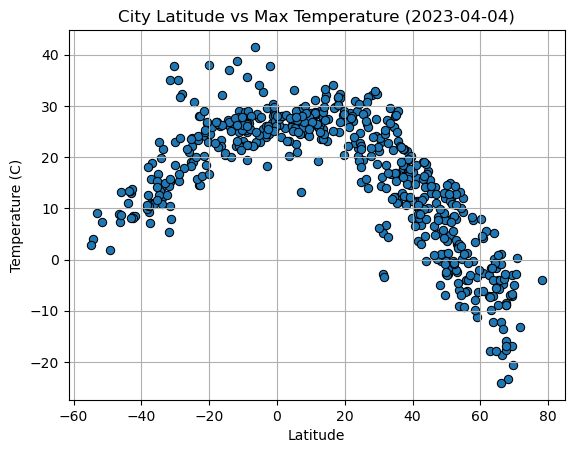

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-04-04)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

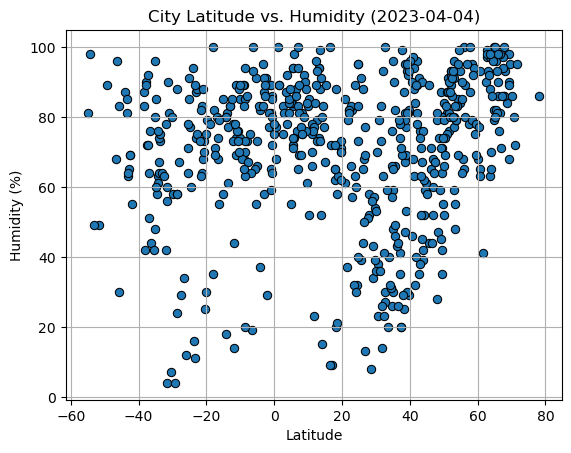

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-04-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

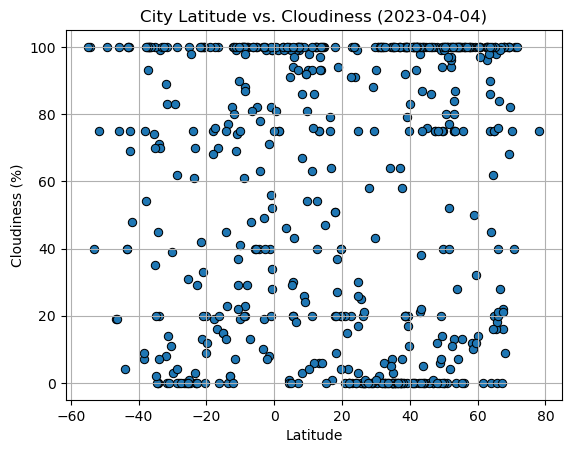

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-04-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

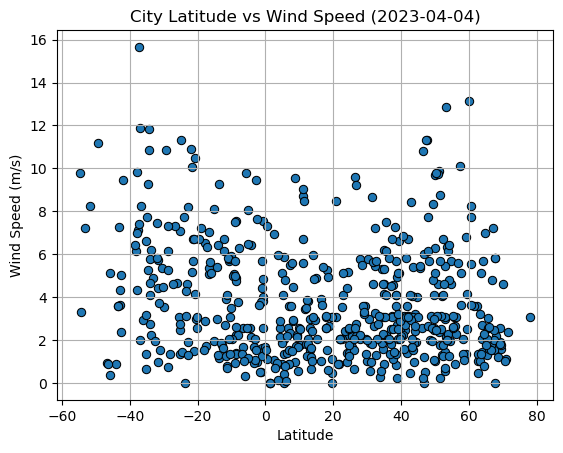

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-04-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,x,y):
    
    (slope, intercept, rvalues, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print("The r-value is: " + str(rvalues))
    
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy =(x,y), fontsize = 15, color = "red")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gunjur,13.2019,-16.7339,29.04,74,75,1.54,GM,1698607051
3,betare oya,5.6000,14.0833,22.54,83,30,1.33,CM,1698607051
4,isafjordur,66.0755,-23.1240,1.10,81,40,1.47,IS,1698607052
5,fort bragg,35.1390,-79.0060,28.85,48,0,4.63,US,1698606924
6,aleksandrovsk,59.1580,57.5624,-3.44,75,100,6.79,RU,1698607052


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.91,89,100,11.20,TF,1698607051
2,port-gentil,-0.7193,8.7815,26.51,86,28,3.82,GA,1698607051
7,karratha,-20.7377,116.8463,26.59,73,100,4.15,AU,1698607052
8,waitangi,-43.9535,-176.5597,11.01,87,4,0.87,NZ,1698607052
10,grytviken,-54.2811,-36.5092,3.94,98,100,3.32,GS,1698607052


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8701289950195963


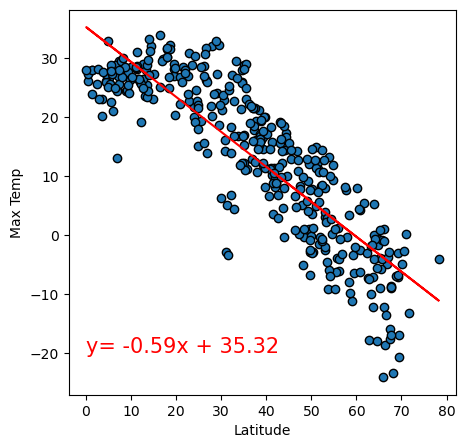

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.figure(figsize = (5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 0, -20)

The r-value is: 0.7528226527816547


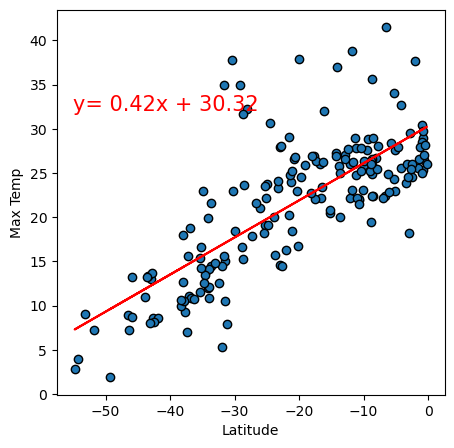

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.figure(figsize = (5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, -55, 32)

**Discussion about the linear relationship:** 

After analyzing the data, we see that the negative R-value with the Northen Hemisphere indicates a strong negative liner relationship between latitude and maximum temperature. The positive R-value with the Southern Hemisphere suggests a strong positive relationship between latitude and maximum temperature. This shows as you move away from the equator the temperature decreases, and as you move closer to the equator the temperature increases.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15184569053086477


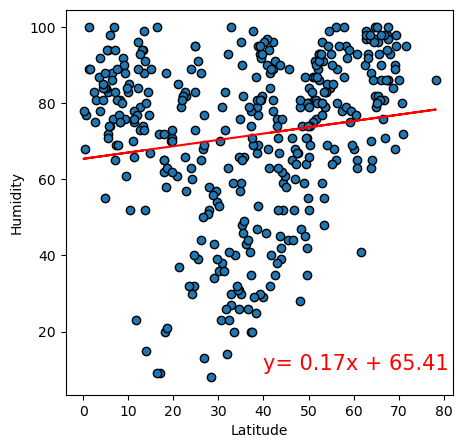

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, 40, 10)

The r-value is: 0.12946069382746697


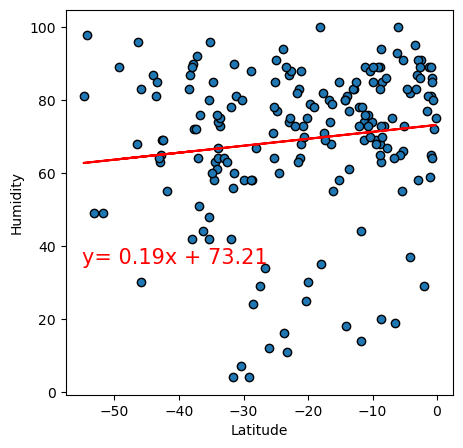

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, -55, 35)

**Discussion about the linear relationship:**

After analyzing the data, we see that the positive R-value with the Northen Hemisphere indicates a weak positive liner relationship between latitude and humidity. The positive R-value with the Southern Hemisphere also suggests a weak positive relationship between latitude and humidity. There is not a lot of evidence that suggest a relationship between these two variables. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06366407218201134


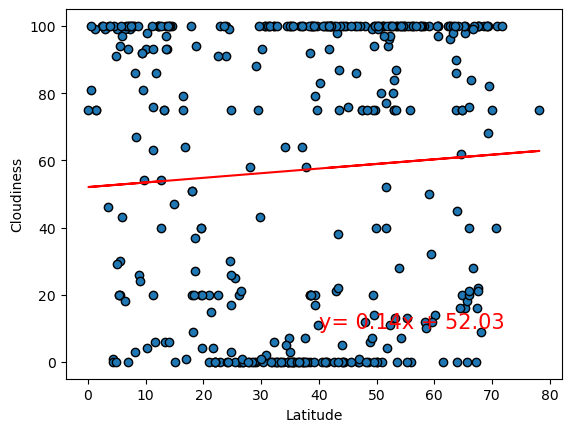

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 40, 10)

The r-value is: 0.039765564871535417


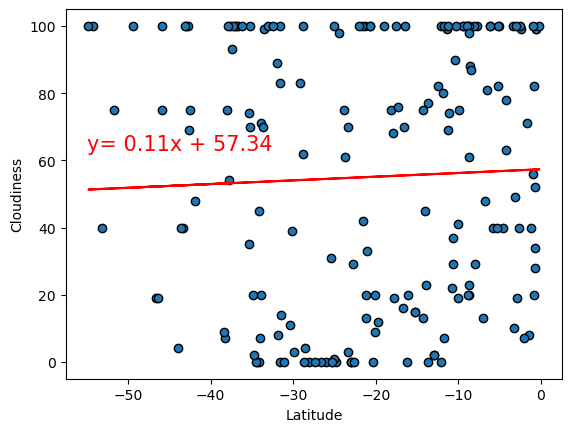

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, -55, 63)

**Discussion about the linear relationship:** 

After analyzing the data, we see that the positive R-value with the Northen Hemisphere indicates a weak positive liner relationship between latitude and cloudiness. The positive R-value with the Southern Hemisphere also suggests a weak positive liner relationship between latitude and cloudiness. The cloudiness does not vary significantly with the change in latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08828242336895399


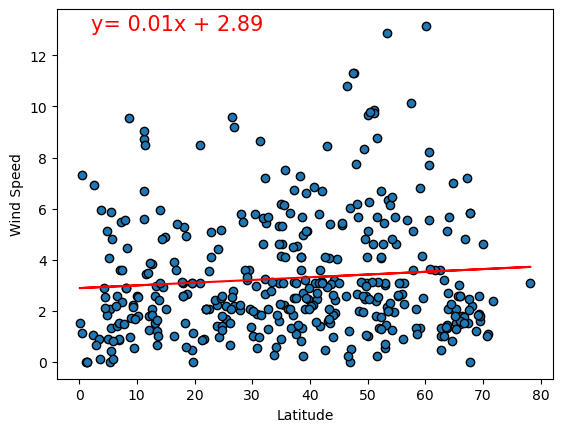

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 2, 13)

The r-value is: -0.26322839964580474


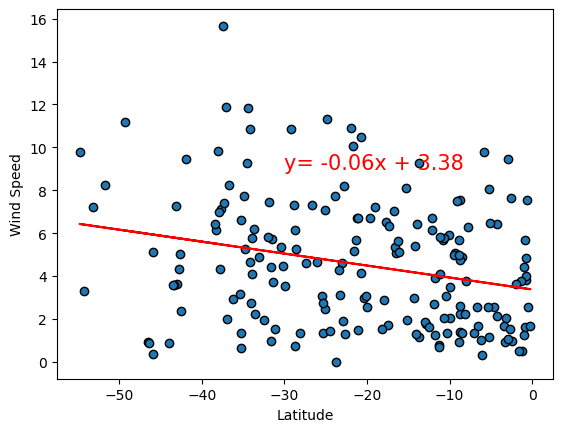

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, -30, 9)

**Discussion about the linear relationship:** 

After analyzing the data, we see that the positive R-value with the Northen Hemisphere indicates a weak positive liner relationship between latitude and wind speed. The positive R-value with the Southern Hemisphere also suggests a weak positive liner relationship between latitude and wind speed. The wind speed does not vary significantly with the change in latitude. 